In [1]:
import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

import os

### read in RMSE pivot tables

In [6]:
window = 3

init_range = pd.date_range(start='2022-12-13 00:00', 
                           end='2022-12-21 00:00',
                           freq='1d')

for init in init_range:
    fss_in = pd.DataFrame(pd.read_csv("fss_pivot_"+init.strftime("%Y%m%d%H")+"_window"+str(window)+".csv").set_index('model')['mean'])
    fss_in = fss_in.rename({'mean':init},axis=1)

    if init == init_range[0]:
        fss_all = fss_in
    else:
        fss_all = pd.concat([fss_all,fss_in], axis=1)

fss_all
    



,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21
model,,,,,,,,,
FCNv2,0.162228,0.172428,0.097755,0.189035,0.081039,0.149435,0.233186,0.319600,0.356630
Pangu,0.039893,0.156671,0.100270,0.382807,0.154234,0.220088,0.413999,0.755085,0.728326
GraphCast,0.225113,0.191903,0.510768,0.262384,0.213875,0.348650,0.665433,0.741492,0.624642
GFS,0.235988,0.398196,0.175235,0.290507,0.186778,0.209851,0.217689,0.624806,0.664341
GEFS mean,0.030698,0.060456,0.099830,0.065880,0.067307,0.143970,0.192956,0.740488,0.727386
0,0.243285,0.278361,0.163584,0.212543,0.149493,0.185942,0.182163,0.784084,0.784534
1,0.068361,0.219100,0.085895,0.190316,0.148425,0.157398,0.207640,0.615969,0.593692
2,0.094557,0.115690,0.215265,0.308803,0.167826,0.205286,0.178726,0.472460,0.527029
3,0.077457,0.193468,0.127493,0.226436,0.264995,0.227450,0.219826,0.406343,0.640430


In [7]:
fss_unstack = fss_all.unstack().reset_index()
fss_unstack.columns = ['valid_time','model','t2m_grad_fss']

fss_unstack

,valid_time,model,t2m_grad_fss
0,2022-12-13,FCNv2,0.162228
1,2022-12-13,Pangu,0.039893
2,2022-12-13,GraphCast,0.225113
3,2022-12-13,GFS,0.235988
4,2022-12-13,GEFS mean,0.030698
...,...,...,...
319,2022-12-21,26,0.463826
320,2022-12-21,27,0.482275
321,2022-12-21,28,0.784009
322,2022-12-21,29,0.774849


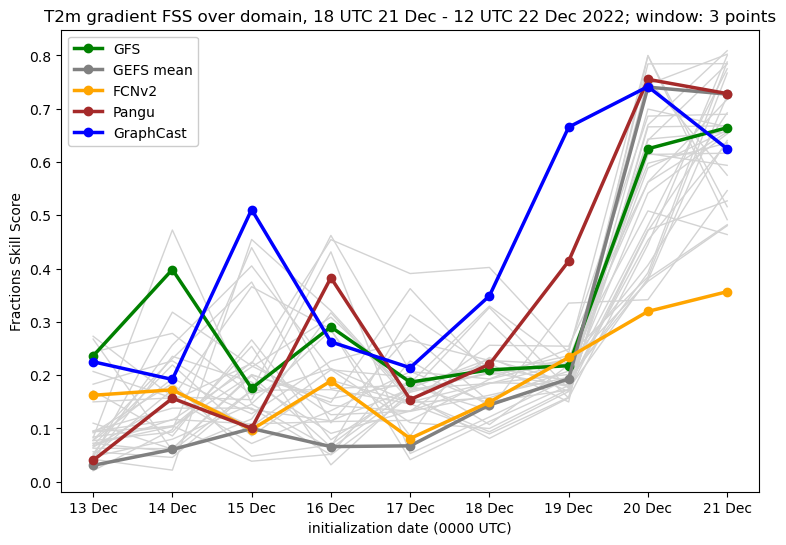

In [8]:
fig, ax = plt.subplots(figsize=(9,6))

gefs_mems = range(0,31)
gefs_mems_str = [str(x) for x in gefs_mems]

#fss_unstack_gefs = fss_unstack[fss_unstack.model.isin(gefs_mems_str)]

for mem in gefs_mems_str:
    gefs_thismem = fss_unstack[fss_unstack.model==mem].set_index('valid_time')
    ax.plot(gefs_thismem.t2m_grad_fss,
                color='lightgray', linewidth=1)

ax.plot(fss_unstack[fss_unstack.model=="GFS"].set_index('valid_time').t2m_grad_fss, 
        color='green', linewidth=2.5, label='GFS', marker='o')
ax.plot(fss_unstack[fss_unstack.model=="GEFS mean"].set_index('valid_time').t2m_grad_fss, 
        color='grey', linewidth=2.5, label='GEFS mean', marker='o')
ax.plot(fss_unstack[fss_unstack.model=="FCNv2"].set_index('valid_time').t2m_grad_fss, 
        color='orange', linewidth=2.5, label='FCNv2', marker='o')
ax.plot(fss_unstack[fss_unstack.model=="Pangu"].set_index('valid_time').t2m_grad_fss, 
        color='brown', linewidth=2.5, label='Pangu', marker='o')
ax.plot(fss_unstack[fss_unstack.model=="GraphCast"].set_index('valid_time').t2m_grad_fss, 
        color='blue', linewidth=2.5, label='GraphCast', marker='o')

ax.legend(framealpha=1)

date_formatter = mdates.DateFormatter('%d %b') # Format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_formatter)
#ax.tick_params('x', labelrotation=45)

ax.set_xlabel("initialization date (0000 UTC)")
ax.set_ylabel("Fractions Skill Score")

plt.title("T2m gradient FSS over domain, 18 UTC 21 Dec - 12 UTC 22 Dec 2022; window: "+str(window)+" points")

plt.savefig("FSS_tser_window"+str(window)+".pdf", 
            transparent=False, facecolor='white', bbox_inches='tight')

plt.show()

In [9]:
fss_mean = fss_unstack.groupby('model').mean()
fss_mean
fss_mean.sort_values(by='t2m_grad_fss', ascending=False)

,valid_time,t2m_grad_fss
model,,
GraphCast,2022-12-17,0.420473
15,2022-12-17,0.360299
GFS,2022-12-17,0.333710
0,2022-12-17,0.331554
Pangu,2022-12-17,0.327930
19,2022-12-17,0.317362
11,2022-12-17,0.307985
30,2022-12-17,0.306490
28,2022-12-17,0.298835
